In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import pandas as pd
import numpy as np

data = pd.read_csv("/Users/aryanthakur/Downloads/MACosmetics_Preprocessed.csv")

data.dropna(subset=['Tweets'], inplace=True)
print(data['Tweets'].isna().sum())

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(data['Tweets'])

normalized_tf_idf = normalize(tf_idf)

print(normalized_tf_idf)

0
  (0, 3174)	0.25918316544500236
  (0, 1471)	0.21518474706482194
  (0, 913)	0.26928687740211205
  (0, 2012)	0.25134611759439923
  (0, 1320)	0.20836577350858598
  (0, 578)	0.26928687740211205
  (0, 495)	0.23952884121213527
  (0, 875)	0.25918316544500236
  (0, 3057)	0.28352725959231573
  (0, 1585)	0.15102373069086758
  (0, 2006)	0.20635830691728177
  (0, 2092)	0.26928687740211205
  (0, 688)	0.24494278325479876
  (0, 2082)	0.23070240106459508
  (0, 2084)	0.20265792929977258
  (0, 778)	0.23952884121213527
  (0, 427)	0.28352725959231573
  (1, 411)	0.7357995557363446
  (1, 524)	0.4319607808200718
  (1, 2047)	0.5215447225420959
  (2, 2364)	0.4732267660540919
  (2, 2032)	0.3275626034329117
  (2, 1575)	0.21110121681655442
  (2, 3673)	0.4732267660540919
  (2, 3282)	0.44945857522498334
  :	:
  (2356, 2708)	0.26334899298046704
  (2356, 1582)	0.2693013291491514
  (2356, 3193)	0.21268055277734152
  (2356, 1717)	0.2425363156072588
  (2356, 1368)	0.24589615136615897
  (2356, 3219)	0.23658397943857445

In [3]:
from sklearn.cluster import KMeans

K = 5

kmeans = KMeans(n_clusters=K, random_state=0).fit(normalized_tf_idf)

In [4]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[0 3 0 ... 0 0 0]


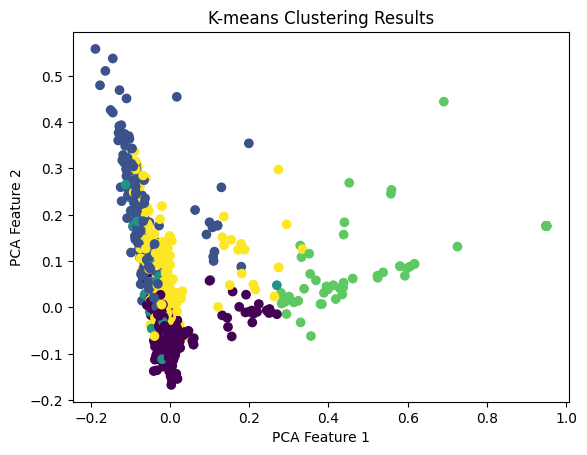

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_tf_idf.toarray())

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

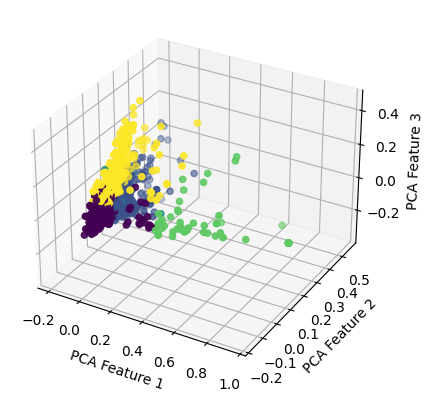

In [7]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_features = pca.fit_transform(normalized_tf_idf.toarray())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=cluster_labels, cmap='viridis')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
plt.show()


In [6]:
data['cluster'] = cluster_labels

In [7]:
cluster_means = data.groupby('cluster').mean()

In [8]:
cluster_means.head()

,Polarity
cluster,
0,0.036792
1,0.026477
2,0.040146
3,-0.004991
4,0.000491


In [12]:
for label in range(K):
    cluster_indices = np.where(cluster_labels == label)[0]
    cluster_tweets = data.iloc[cluster_indices]['Tweets']
    word_counts = {}
    for tweet in cluster_tweets:
        words = tweet.split()
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    most_frequent_words = [word for word, count in sorted_words]
    print(f"Cluster {label}: {most_frequent_words}")

Cluster 0: ['mac', 'go', 'makeup', 'you', 're']
Cluster 1: ['not', 'do', 'woman', 'be', 'people']
Cluster 2: ['look', 'like', 'makeup', 'not', 'do']
Cluster 3: ['boycott', 'another', 'woman', 'list', 'brand']
Cluster 4: ['woman', 'man', 'product', 'buy', 'makeup']


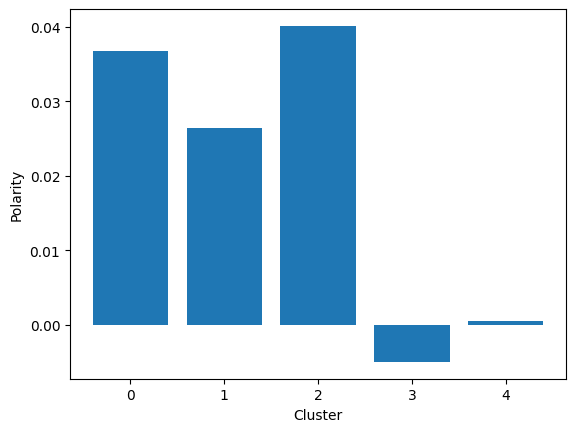

In [9]:
import matplotlib.pyplot as plt

plt.bar(cluster_means.index, cluster_means['Polarity'])
plt.xlabel('Cluster')
plt.ylabel('Polarity')
plt.show()